# Import Libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- _numpy_ membantu dalam hal konteks mathematical processing
- _matplotlib_ membantu dalam hal membuat plotting pada chart
- _pandas_ membantu dalam hal import dan manage data 

# Import Dataset

In [72]:
dataset = pd.read_excel('data.xlsx')

In [73]:
dataset

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Road Hard,2015,6.3,3,106000,1500000.0,22.0,1,14,44963,109,27,42,1188000.0
230,Ant-Man,2015,7.8,1,169000000,130000000.0,3856.0,1,18,9597644,32558,2672,8359,NaN
231,Run All Night,2015,6.6,8,26400000,50000000.0,3171.0,1,3,5671767,10073,480,1712,NaN
232,The Second Best Exotic Marigold Hotel,2015,6.6,1,33100000,10000000.0,1573.0,2,26,831044,2427,99,247,NaN


Data berisi list film tahun 2014-2015 beserta propertiesnya (genre, gross, budget, dst).

In [74]:
# Ukuran data
dataset.shape

(234, 14)

In [75]:
# Dimensi data
dataset.ndim

2

In [76]:
# Tipe data per column
dataset.dtypes

Movie                   object
Year                     int64
Ratings                float64
Genre                    int64
Gross                    int64
Budget                 float64
Screens                float64
Sequel                   int64
Sentiment                int64
Views                    int64
Likes                    int64
Dislikes                 int64
Comments                 int64
Aggregate Followers    float64
dtype: object

# Data Preprocessing

## Missing values

In [77]:
# Cek apakah ada missing values pada setiap column
pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values']).T

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Missing Values,0,0,0,0,0,1,10,0,0,0,0,0,0,36


Terdapat missing values pada Budget, Screens, dan Aggregate Followers

In [78]:
# Posisi missing values di Budget
#dataset.loc[pd.isnull(dataset["Budget"]), :]

In [79]:
# Posisi missing values di Budget
#dataset.loc[pd.isnull(dataset["Screens"]), :]

In [80]:
# Posisi missing values di Budget
#dataset.loc[pd.isnull(dataset["Aggregate Followers"]), :]

## Taking care of missing values 

## Penanganan missing values pada column `Budget` 

Pada tabel missing value di atas, terdapat satu data yang tidak memiliki nilai di fitur `Budget`. Karena hanya satu data yang tidak punya nilai, menghapusnya dari data tidak akan terlalu berpengaruh bagi analisis dibandingkan mengisinya.

In [81]:
# drop
index_budget_empty = dataset[dataset['Budget'].isnull()].index
dataset.drop(index_budget_empty, axis = 0, inplace = True)

In [82]:
# look at miss. value after removal
pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values']).T

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Missing Values,0,0,0,0,0,0,10,0,0,0,0,0,0,36


## Penanganan missing values pada column `Screens` 

Terlihat bahwa terdapat 10 data yang tidak memiliki nilai pada column `Screens`. Karena cukup banyak data yang tidak punya nilai tersebut, kita tidak bisa menghapusnya, sehingga cara yang tepat adalah dengan mengisinya. Kita bisa mengisi dengan nilai rata-rata atau median-nya. Namun, kita perlu melihat apakah ada *outlier* pada fitur `Screens`. Jika ada, maka kita perlu mengisi dengan median, karena nilai median tidak terpengaruh oleh outlier. Jika tidak ada, maka bisa kita isi dengan nilai rata-ratanya saja.

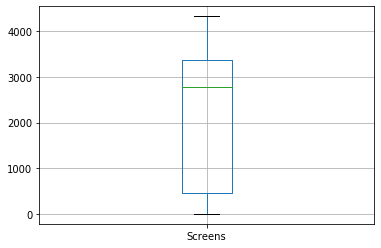

In [83]:
# Salah satu cara untuk melihat outlier adalah dengan melihat boxplot-nya
dataset[['Screens']].boxplot()
plt.show()

Karena pada boxplot tersebut tidak terdapat outlier, maka kita isi data yang tidak memiliki nilai di fitur `Screens` dengan nilai rata-rata.

In [84]:
# fill with mean
dataset['Screens'] = dataset['Screens'].fillna(dataset['Screens'].mean())

In [85]:
# look at miss. value after handling
pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values']).T

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,36


## Penanganan missing values pada column `Aggregate Followers` 

Teknik yang digunakan untuk menangani fitur ini sama seperti pada penanganan column `Screens`, yaitu diisi (tidak dihapus). Untuk menentukan diisi dengan nilai apa, akan dilihat terlebih dahulu boxplot nya.

## Salah satu cara untuk melihat outlier adalah dengan melihat boxplot-nya

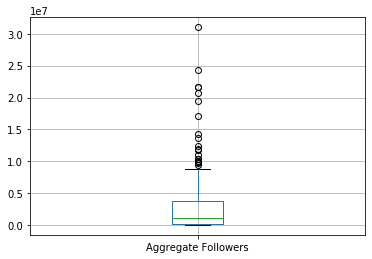

In [86]:
dataset[['Aggregate Followers']].boxplot()
plt.show()

terlihat bahwa banyak outlier, maka sebaiknya missing value pada column `Aggregate Followers` diisi dengan nilai median-nya.

In [87]:
# fill with median
dataset['Aggregate Followers'] = dataset['Aggregate Followers'].fillna(dataset['Aggregate Followers'].median())

In [88]:
# look at miss. value after handling
pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values']).T

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
dataset.shape

(233, 14)

## Menangani Outliers 

Akan dilihat outlier pada fitur-fitur numerik selain fitur target (`Ratings`), yaitu pada `Gross`, `Budget`, `Screens`, `Views`, `Likes`, `Dislikes`, `Comments`, dan `Aggregate Followers`

In [90]:
input_feat = ['Gross', 'Budget', 'Screens', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']

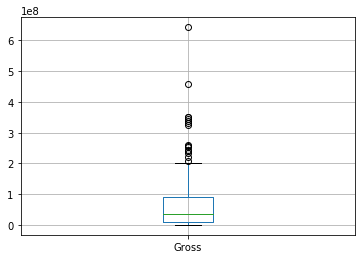

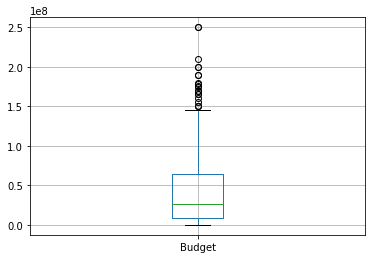

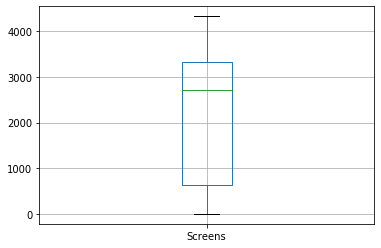

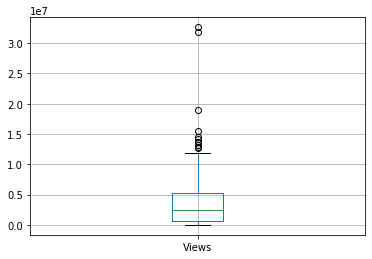

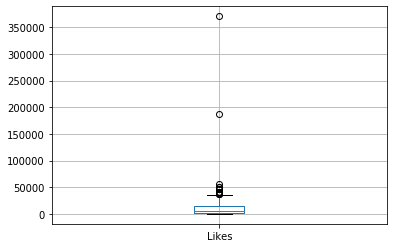

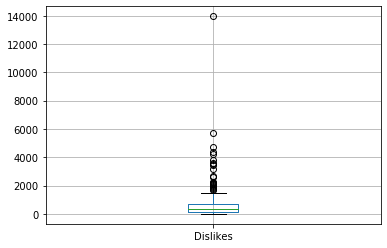

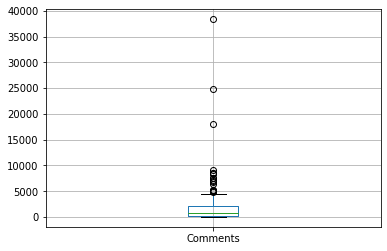

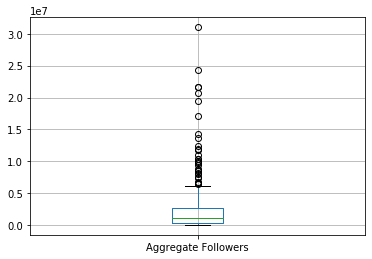

In [91]:
for col in input_feat:
    dataset[[col]].boxplot()
    plt.show()

Dapat dilihat bahwa dari fitur-fitur numerik tersebut, hampir semua (kecuali `Screens`) memiliki outlier. Outlier pada suatu fitur adalah data yang nilai pada fitur tersebut lebih tinggi daripada kuartil ketiga (garis teratas) pada boxplot fitur tersebut. Untuk itu, kita buang data-data outlier tersebut.

In [92]:
# quartil ke tiga (0-100)
def q3(data):
    return np.percentile(data, 75, axis = 0).astype('int')

def outlier_index(data):
    return np.where(np.less_equal(data[input_feat], q3(data[input_feat])).all(axis = 1))[0]

In [93]:
# drop outliers
dataset.drop(outlier_index(dataset), axis = 0, inplace = True)

In [94]:
# look the shape after removal
dataset.shape

(142, 14)

menghapus outlier mengurangi baris pada data kita dari 233 menjadi 142

## Menghapus data duplikat 

In [95]:
dataset = dataset.drop_duplicates()

In [96]:
dataset.shape

(142, 14)

Ukuran dari data masih sama, tidak ada duplikat

## Analisa Data 

## Melihat perbandingan "Likes" dan "Dislikes" 

Seringkali kali kita melihat kualitas suatu film hanya pada satu sudut pandang, dalam hal ini kita akan membandingkan dengan memperhatikan "likes" dan "dislikes".

Text(0.5, 1.0, 'Grafik "Likes"')

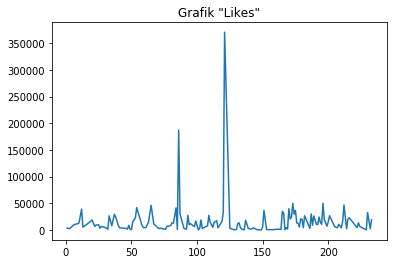

In [97]:
plt.plot(dataset[['Likes']])
plt.title('Grafik "Likes"')

Text(0.5, 1.0, 'Grafik "Dislikes"')

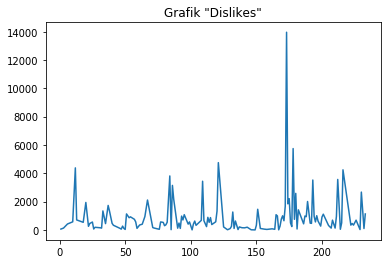

In [98]:
plt.plot(dataset[['Dislikes']])
plt.title('Grafik "Dislikes"')

Bukti bahwa tidak ada "Liked" dan "Dislikes" yang bernilai 0

In [99]:
dataset[dataset['Likes']==0]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers


In [100]:
dataset[dataset['Dislikes']==0]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers


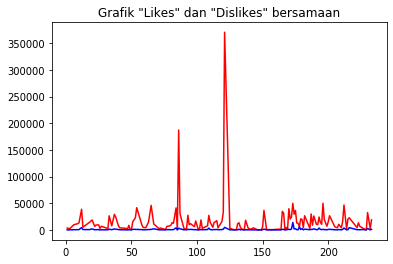

In [101]:
plt.plot(dataset[['Likes']],'r',dataset[['Dislikes']], 'b');
plt.title('Grafik "Likes" dan "Dislikes" bersamaan')
plt.show()

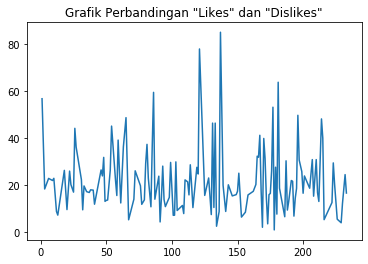

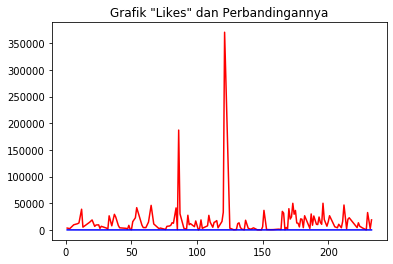

In [102]:
li=dataset['Likes'];
disli=dataset['Dislikes'];
banding=li/disli;
plt.plot(banding);
plt.title('Grafik Perbandingan "Likes" dan "Dislikes"');
plt.show();
plt.plot(li,'r',banding,'b');
plt.title('Grafik "Likes" dan Perbandingannya');
plt.show();

Movie terbaik menurut "Likes".

In [103]:
dataset.sort_values(by = 'Likes',ascending=False).head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
121,The Fault in Our Stars,2014,7.9,3,125000000,12000000.0,3173.000000,1,7,32626778,370552,4752,38363,4240000.0
86,Not Cool,2014,5.2,8,35700,600000.0,2206.103139,1,0,5403836,187162,3145,24919,2720000.0
196,The Age of Adaline,2015,7.3,3,42500000,25000000.0,2991.000000,1,11,11036701,50002,1005,3525,776000.0
173,Fifty Shades of Grey,2015,4.2,3,166000000,40000000.0,3646.000000,1,9,31859569,49900,13960,9119,946000.0
212,Hitman: Agent 47,2015,5.9,8,16100000,35000000.0,3261.000000,1,10,13154873,46684,3565,8578,209000.0


Movie terbaik menurut perbandingan "Likes" dan "Dislikes".

In [104]:
bd=pd.DataFrame({'Comparison':banding});
df=dataset.join(bd);
df.shape;

In [105]:
df.sort_values(by = 'Comparison',ascending=False).head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Comparison
137,The Maze Runner,2014,6.8,1,102000000,34000000.0,173.000000,1,2,3156436,18124,213,2753,4734000.0,85.089202
121,The Fault in Our Stars,2014,7.9,3,125000000,12000000.0,3173.000000,1,7,32626778,370552,4752,38363,4240000.0,77.978114
181,Tomorrowland,2015,6.6,12,93200000,190000000.0,3972.000000,1,1,999867,4212,66,250,1198000.0,63.818182
86,Not Cool,2014,5.2,8,35700,600000.0,2206.103139,1,0,5403836,187162,3145,24919,2720000.0,59.510970
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.000000,2,2,583289,3465,61,186,12350000.0,56.803279
